In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_sex = LabelEncoder()

In [8]:
df['sex'] = le_sex.fit_transform(df['Sex'])

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare,sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [10]:
df.dropna(inplace=True)

In [11]:
df.drop('Sex',axis = 1, inplace = True)

In [12]:
df.head()

,Survived,Pclass,Age,Fare,sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [13]:
X = df.drop('Survived',axis=1)
X.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [14]:
X.head()
X.isnull().sum()

Pclass    0
Age       0
Fare      0
sex       0
dtype: int64

In [15]:
y = df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [80]:
model = DecisionTreeClassifier()

In [81]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
model.score(X_test,y_test)

0.813953488372093

In [83]:
model.score(X_train,y_train)

0.9859719438877755

In [84]:
y_predicted = model.predict(X_test)

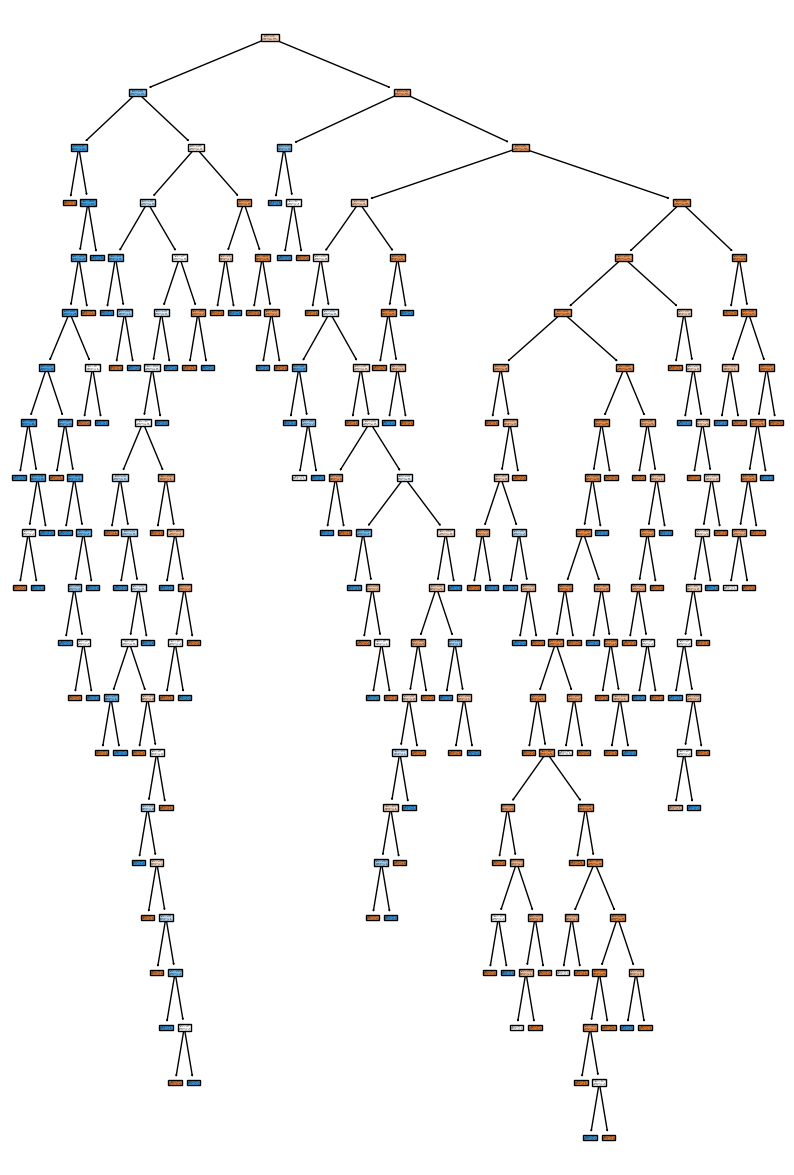

In [22]:
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)
plt.show()

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
cme = confusion_matrix(y_predicted,y_test)
cme

array([[110,  16],
       [ 24,  65]], dtype=int64)

<AxesSubplot:>

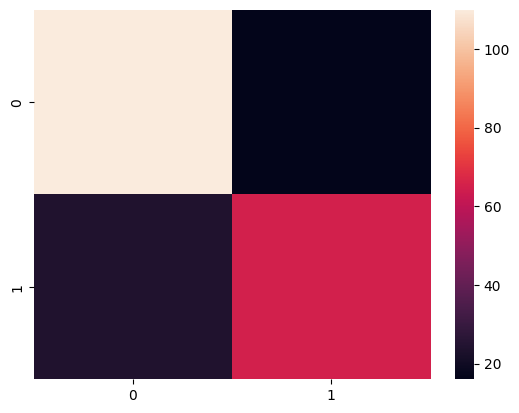

In [87]:
sns.heatmap(cme)

In [88]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       134
           1       0.73      0.80      0.76        81

    accuracy                           0.81       215
   macro avg       0.80      0.81      0.81       215
weighted avg       0.82      0.81      0.82       215

